In [ ]:
import ENDFtk
import numpy as np
import matplotlib.pyplot as plt
from ENDFtk.MF4 import Section

# tape = ENDFtk.tree.Tape.from_file( '/home/sole-pie01/ndlib/jeff33/13-Al-26g.jeff33' )
tape = ENDFtk.tree.Tape.from_file( '/home/sole-pie01/ndlib/jeff-40/13-Al-26g.txt')
# tape = ENDFtk.tree.Tape.from_file( '/home/sole-pie01/ndlib/jeff-40/82-Pb-208g.txt' )
mf4mt2 = tape.MAT(tape.material_numbers[0]).MF(4).MT(2).parse()
angulard = tape.materials.front().section( 4, 2 ).parse()
mf4mt2.LTT
# dist = angulard.distributions.legendre.incident_energies
angulard.distributions.l

3

In [18]:
tape = ENDFtk.tree.Tape.from_file( '/home/sole-pie01/ndlib/jeff-40/13-Al-26g.txt')
mf4mt2 = tape.MAT(tape.material_numbers[0]).MF(4).MT(2).parse()
angulard = tape.materials.front().section( 4, 2 ).parse()
leg1_original = [angulard.distributions.legendre.angular_distributions[iLeg].coefficients[:][0] for iLeg in range(len(angulard.distributions.legendre.angular_distributions))]

# Now open file sampled_tape_random1.endf, retrieve leg1_perturb and divide by leg1_original
sampled_tape = ENDFtk.tree.Tape.from_file( './sampled_tape_random1.endf' )
mf4mt2_sampled = sampled_tape.MAT(sampled_tape.material_numbers[0]).MF(4).MT(2).parse()
angulard_sampled = sampled_tape.materials.front().section( 4, 2 ).parse()
leg1_sampled = [angulard_sampled.distributions.legendre.angular_distributions[iLeg].coefficients[:][0] for iLeg in range(len(angulard_sampled.distributions.legendre.angular_distributions))]   
# Calculate the perturbation factor (avoid division by zero)
perturbation_factors = []
for i in range(len(leg1_original)):
    if leg1_original[i] != 0:
        perturbation_factors.append(leg1_sampled[i] / leg1_original[i])
    else:
        perturbation_factors.append(0)  # or handle as needed
# Print the perturbation factors
print(perturbation_factors)

[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045012653622467265, 0.04352050292351499, 0.04588702449062172, 0.11739898761994302, 0.25379803227699677, 0.3092205545048489, 0.3036156802751192, 0.33715682774202754, 0.39977245517196175, 0.5000544856475385, 0.5800252871235226, 0.5751154350591225, 0.6338027964079064, 0.763157025886291, 0.8451547891908382, 0.8570026367398206, 0.8239053639250153, 0.8374090874554201, 0.8401888579213295, 0.867534834417551, 0.8643574718825596, 0.8465618196556309, 0.8595699111571214, 0.8652657430340592, 0.8842440165925781]


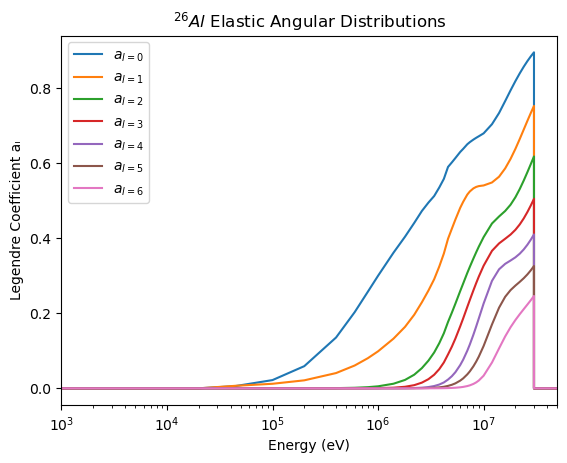

In [26]:
def plot_legendre_coeffs(angulard, orders):
    """
    Plot Legendre coefficients for given order(s) as a function of incident energy.

    Parameters:
    angulard: parsed angular distribution object
    orders: int or list of ints, Legendre order(s) to plot
    """
    if isinstance(orders, int):
        orders = [orders]

    energies = [dist.incident_energy for dist in angulard.angular_distributions.to_list()]
    max_order = max(len(dist.coefficients[:]) for dist in angulard.distributions.legendre.angular_distributions.to_list())
    coeff_array = np.zeros((len(energies), max_order))

    for i, dist in enumerate(angulard.distributions.legendre.angular_distributions.to_list()):
        coeffs = dist.coefficients
        coeff_array[i, :len(coeffs)] = coeffs

    for l in orders:
        if l < max_order:
            plt.plot(energies, coeff_array[:, l], label=r'$a_{l=%d}$' % l)
        else:
            print(f"Order {l} exceeds available maximum order {max_order-1}")

    plt.xscale('log')
    plt.xlim(1000,5e7)
    plt.xlabel('Energy (eV)')
    plt.ylabel('Legendre Coefficient aₗ')
    plt.title(r'$^{26}Al$ Elastic Angular Distributions')
    plt.legend()
    plt.show()
    
plot_legendre_coeffs(angulard, [0, 1, 2, 3, 4, 5, 6])

In [5]:
print(angulard.distributions.legendre.angular_distributions[2].incident_energy)
print(angulard.distributions.legendre.angular_distributions[2].coefficients[:])

for dist in angulard.distributions.legendre.angular_distributions:
    print(dist.incident_energy, dist.coefficients[:])
    # plt.plot(dist.cosines, dist.coefficients[:], label=f'E = {dist.incident_energy} MeV')

100000.0
[0.0227151, 0.01204897, 1.103639e-05, 1.662321e-06, 2.29293e-10, 2.476347e-09]
1e-05 [0.0, 0.0]
60000.0 [0.0, 0.0]
100000.0 [0.0227151, 0.01204897, 1.103639e-05, 1.662321e-06, 2.29293e-10, 2.476347e-09]
200000.0 [0.06088515, 0.02149582, 7.938619e-05, 7.480005e-06, 6.32421e-09, 4.087307e-08]
400000.0 [0.139718, 0.04148794, 0.0005229926, 3.744178e-05, 1.666302e-07, 4.078246e-07]
600000.0 [0.209479, 0.06229706, 0.001522394, 0.0001141823, 1.166095e-06, 1.411953e-06, 1.030123e-09, 7.09414e-10]
800000.0 [0.2662959, 0.08263326, 0.003185066, 0.0002740896, 4.770829e-06, 3.46156e-06, 7.556877e-09, 2.9291e-09]
1000000.0 [0.3110635, 0.1018003, 0.005571799, 0.0005633066, 1.445672e-05, 7.219363e-06, 3.528576e-08, 8.509421e-09]
1400000.0 [0.3754809, 0.136977, 0.0127167, 0.001766667, 7.8597e-05, 2.490031e-05, 3.538599e-07, 4.548229e-08]
1800000.0 [0.4188664, 0.1692438, 0.02320931, 0.004259756, 0.0002792983, 7.183335e-05, 1.917944e-06, 1.850347e-07, 4.046574e-09, 4.40922e-10]
2200000.0 [0.4544

# Writing a file

In [7]:
from ENDFtk.MF4 import LegendreDistributions
from ENDFtk.MF4 import TabulatedDistributions
# from ENDFtk.MF4 import MixedDistributions
from ENDFtk.MF4 import LegendreCoefficients
from ENDFtk.MF4 import TabulatedDistribution
from ENDFtk.MF4 import Section as Section4
from ENDFtk.tree import Tape

tape = Tape.from_file('./writeMF4/dumAl26.endf')

# Parse the section to update
mf4mt2 = tape.MAT(tape.material_numbers[0]).MF(4).MT(2).parse()
# Update the distributions using the new factors
distributions_bis = LegendreDistributions(
    boundaries = [ 2 ], interpolants = [ 1 ],
    distributions = [ LegendreCoefficients( 1e-5, [ 7.392510e-5, 8.477139e-9, 1.17106e-13 ] ),
                      LegendreCoefficients( 1e+6, [ 2.874390e-2, 3.19645e-11 ] ) ] )
        
# Create new Section and replace in tape
new_section = Section4(
mt=2,
lct=mf4mt2.LCT,
zaid=mf4mt2.ZA,
awr=mf4mt2.AWR,
distributions=distributions_bis  # Should be updated with new factors
)

from ENDFtk.MF34 import Section as Section34
from ENDFtk.MF34 import ReactionBlock
from ENDFtk.MF34 import LegendreBlock
from ENDFtk import SquareMatrix

mf34_m2bis = Section34(
mt=2, zaid=94239, awr=2.369986e+2, ltt=1,
reactions=[ReactionBlock(
    2, 51, 1, 1,
    [LegendreBlock(
        1, 1, 0,
        [SquareMatrix(
            0, [0, 100, 200], [1, 2, 3, 4]
            )]
        )]
    )]
)

mat_num = tape.material_numbers[0]
tape.MAT(mat_num).MF(4).insert_or_replace(new_section)

tape.to_file(f'./writeMF4/dumAl26bis.endf')

## Uncertainties

In [ ]:
# Extracting covariance matrix from MF34
angularu = tape.materials.front().section( 34, 2 ).parse()
angularu.reactions[0].number_legendre_blocks # 21 Legendre blocks
# that is n(n+1)/2 = 21 (e.g. covariance between orders 1-1, 1-2, ..., 1-6, 2-2, ..., 2-6, ..., 6-6)
iblock = 0
block11 = angularu.reactions[0].legendre_blocks[iblock]
# block11.first_legendre_order and block11.second_legendre_order will be 1 and 1
nBins = block11.data[0].NE - 1 # 10 energies given, thus 9 bins
block11.data[0].values[:] # will store 9(9+1)/2 = 45 values
block11.data[0].energies[:] # Bin boundaries, 10 values
# Each legendre coefficient is bin-averaged and covariance is given between those bins. Also between orders. 
cov_matrix = np.zeros((nBins, nBins))
triu_indices = np.triu_indices(nBins)
cov_matrix[triu_indices] = block11.data[0].values[:]
cov_matrix[(triu_indices[1], triu_indices[0])] = block11.data[0].values[:]

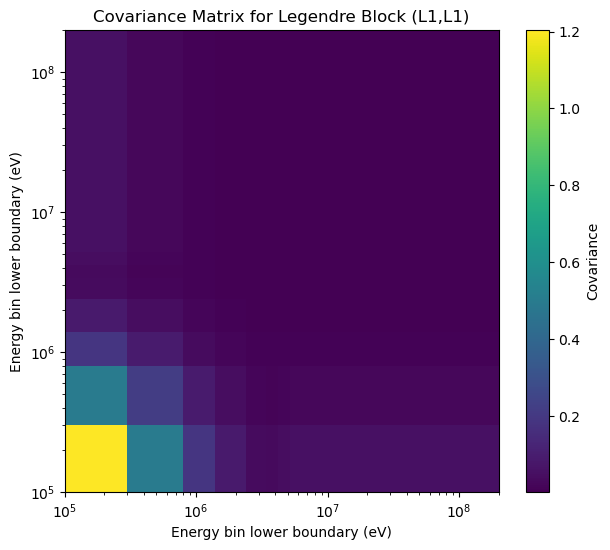

In [29]:
def get_legendre_cov_block(legendre_blocks, LegOrder1, LegOrder2):
    """
    Retrieve the Legendre covariance block for the specified orders.

    Parameters:
    legendre_blocks : list
        List of LegendreBlock objects (e.g., angularu.reactions[0].legendre_blocks)
    LegOrder1 : int
        First Legendre order (1-based)
    LegOrder2 : int
        Second Legendre order (1-based)

    Returns:
    block : ENDFtk.MF34.LegendreBlock
        The block corresponding to (LegOrder1, LegOrder2), or None if not found.
    """
    for block in legendre_blocks:
        if (block.first_legendre_order == LegOrder1 and block.second_legendre_order == LegOrder2) or \
           (block.first_legendre_order == LegOrder2 and block.second_legendre_order == LegOrder1):
            return block
    return None

def build_legendre_cov_matrix(legendre_blocks, order1=1, order2=1):
    """
    Build the covariance matrix for the specified Legendre orders from MF34 legendre_blocks.

    Parameters:
    legendre_blocks : list
        List of LegendreBlock objects (e.g., angularu.reactions[0].legendre_blocks)
    order1 : int
        First Legendre order (default 1)
    order2 : int
        Second Legendre order (default 1)

    Returns:
    cov_matrix : np.ndarray
        Covariance matrix (nBins x nBins)
    bin_boundaries : list
        List of bin boundary energies (length nBins+1)
    """
    block = get_legendre_cov_block(legendre_blocks, order1, order2)
    if block is None:
        raise ValueError(f"No block found for Legendre orders ({order1},{order2})")
    nBins = block.data[0].NE - 1
    bin_boundaries = block.data[0].energies[:]
    cov_matrix = np.zeros((nBins, nBins))
    triu_indices = np.triu_indices(nBins)
    cov_matrix[triu_indices] = block.data[0].values[:]
    cov_matrix[(triu_indices[1], triu_indices[0])] = block.data[0].values[:]
    return cov_matrix, bin_boundaries


# cov_matrix, energies = build_legendre_cov_matrix(angularu.reactions[0].legendre_blocks, 1, 1)
angularu = tape.materials.front().section( 34, 2 ).parse()
angularu.reactions[0].number_legendre_blocks # 21 Legendre blocks

cov_matrix, covenergies = build_legendre_cov_matrix(angularu.reactions[0].legendre_blocks, 1, 1)

# Plot the covariance matrix using pcolormesh for log-scale energy axes
plt.figure(figsize=(7, 6))
X, Y = np.meshgrid(covenergies, covenergies)
pcm = plt.pcolormesh(X, Y, cov_matrix, cmap='viridis')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy bin lower boundary (eV)')
plt.ylabel('Energy bin lower boundary (eV)')
plt.title('Covariance Matrix for Legendre Block (L1,L1)')
plt.colorbar(pcm, label='Covariance')
plt.show()

In [ ]:
# Plot only the first order Legendre coefficient a_1(E) with error bands
# Using the same approach as in cell 2 but showing only L=1

energies = [dist.incident_energy for dist in angulard.angular_distributions.to_list()]
max_order = max(len(dist.coefficients[:]) for dist in angulard.distributions.legendre.angular_distributions.to_list())
coeff_array = np.zeros((len(energies), max_order))

for i, dist in enumerate(angulard.distributions.legendre.angular_distributions.to_list()):
    coeffs = dist.coefficients
    coeff_array[i, :len(coeffs)] = coeffs

# Get the relative variance from the covariance matrix diagonal
relative_variance_a1 = np.diag(cov_matrix)  # This is relative variance from MF34
bin_boundaries = covenergies  # Energy bin boundaries from MF34

# Calculate absolute standard deviation for each energy point
a1_coeffs = coeff_array[:, 1]  # First order coefficients
std_absolute_array = np.zeros_like(a1_coeffs)

for i, energy in enumerate(energies):
    # Find which bin this energy falls into
    bin_idx = np.searchsorted(bin_boundaries[:-1], energy, side='right') - 1
    bin_idx = np.clip(bin_idx, 0, len(relative_variance_a1) - 1)  # Ensure within bounds
    
    # Get the relative variance for this energy bin
    rel_var = relative_variance_a1[bin_idx]
    
    # Convert relative variance to absolute variance: Var_abs = Var_rel * a1²
    abs_var = rel_var * (a1_coeffs[i]**2)
    
    # Calculate absolute standard deviation
    std_absolute_array[i] = np.sqrt(abs_var)

# Plot only the first order coefficient (L=1) with error bands
plt.figure(figsize=(8, 6))
plt.plot(energies, a1_coeffs, '.-', linewidth=2, markersize=4, label=r'$a_1(E)$')
plt.fill_between(energies, a1_coeffs - std_absolute_array, a1_coeffs + std_absolute_array, 
                 alpha=0.3, label=r'$\pm 1\sigma$ uncertainty')
plt.xscale('log')
plt.xlim(1000, 3e7)
plt.xlabel('Energy (eV)')
plt.ylabel(r'Legendre Coefficient $a_1$')
plt.title(r'$^{26}Al$ Elastic Angular Distributions - First Order Coefficient (L=1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
energies = [dist.incident_energy for dist in angulard.angular_distributions.to_list()]
max_order = max(len(dist.coefficients[:]) for dist in angulard.distributions.legendre.angular_distributions.to_list())
coeff_array = np.zeros((len(energies), max_order))

for i, dist in enumerate(angulard.distributions.legendre.angular_distributions.to_list()):
    coeffs = dist.coefficients
    coeff_array[i, :len(coeffs)] = coeffs

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

def plot_legendre_coeffs_with_uncertainty(orders, energies, coeff_array, angularu):
    """
    Plot Legendre coefficients for given orders with error bands from MF34 covariance.
    Group each coefficient and its error band together in the legend.
    """
    custom_handles = []
    custom_labels = []

    for iLegOrder in orders:
        cov_matrix, bin_boundaries = build_legendre_cov_matrix(
            angularu.reactions[0].legendre_blocks, iLegOrder, iLegOrder)
        relative_variance = np.diag(cov_matrix)
        coeffs = coeff_array[:, iLegOrder]
        std_absolute_array = np.zeros_like(coeffs)

        for i, energy in enumerate(energies):
            bin_idx = np.searchsorted(bin_boundaries[:-1], energy, side='right') - 1
            bin_idx = np.clip(bin_idx, 0, len(relative_variance) - 1)
            rel_var = relative_variance[bin_idx]
            abs_var = rel_var * (coeffs[i] ** 2)
            std_absolute_array[i] = np.sqrt(abs_var)

        # Plot the actual data
        line, = plt.plot(energies, coeffs, '.-', linewidth=2, markersize=4)
        band = plt.fill_between(energies, coeffs - std_absolute_array, coeffs + std_absolute_array, 
                                alpha=0.2, color=line.get_color())

        # Create custom legend entry (line + band together)
        legend_line = Line2D([0], [0], color=line.get_color(), marker='.', linestyle='-')
        legend_band = Patch(facecolor=line.get_color(), alpha=0.2, edgecolor='none')

        # Use a tuple of legend handles to get them on the same line
        custom_handles.append((legend_line, legend_band))
        custom_labels.append(rf'$a_{{\ell={iLegOrder}}}(E) \pm 1\sigma$')

    # Build legend with custom handler_map to group line + patch on same entry
    from matplotlib.legend_handler import HandlerTuple
    plt.legend(custom_handles, custom_labels, handler_map={tuple: HandlerTuple(ndivide=None)})

    plt.xscale('log')
    plt.xlim(1000, 3e7)
    plt.xlabel('Energy (eV)')
    plt.ylabel(r'Legendre Coefficient $a_\ell$')
    plt.title(r'$^{26}$Al Elastic Angular Distributions – Legendre Coefficients')
    plt.grid(True, alpha=0.3)
    plt.show()



# def plot_legendre_coeffs_with_uncertainty(orders, energies, coeff_array, angularu):
#     """
#     Plot Legendre coefficients for given orders with error bands from MF34 covariance.

#     Parameters:
#     orders: list of int
#         Legendre orders to plot (0-based index)
#     energies: list or np.ndarray
#         Energies corresponding to coeff_array rows
#     coeff_array: np.ndarray
#         Array of Legendre coefficients (shape: [n_energies, n_orders])
#     angularu: ENDFtk.MF34.Section
#         Parsed MF34 angular distribution section
#     """
#     for iLegOrder in orders:
#         # Get covariance matrix and bin boundaries for this order
#         cov_matrix, covenergies = build_legendre_cov_matrix(angularu.reactions[0].legendre_blocks, iLegOrder, iLegOrder)
#         relative_variance = np.diag(cov_matrix)
#         bin_boundaries = covenergies

#         coeffs = coeff_array[:, iLegOrder]
#         std_absolute_array = np.zeros_like(coeffs)

#         for i, energy in enumerate(energies):
#             bin_idx = np.searchsorted(bin_boundaries[:-1], energy, side='right') - 1
#             bin_idx = np.clip(bin_idx, 0, len(relative_variance) - 1)
#             rel_var = relative_variance[bin_idx]
#             abs_var = rel_var * (coeffs[i] ** 2)
#             std_absolute_array[i] = np.sqrt(abs_var)

#         plt.plot(energies, coeffs, '.-', linewidth=2, markersize=4, label=rf'$a_{{{iLegOrder}}}(E)$')
#         plt.fill_between(energies, coeffs - std_absolute_array, coeffs + std_absolute_array, 
#                          alpha=0.2, label=rf'$\pm 1\sigma$ (L={iLegOrder})')

#     plt.xscale('log')
#     plt.xlim(1000, 3e7)
#     plt.xlabel('Energy (eV)')
#     plt.ylabel(r'Legendre Coefficient $a_l$')
#     plt.title(r'$^{26}Al$ Elastic Angular Distributions - Legendre Coefficients')
#     plt.legend()
#     plt.grid(True, alpha=0.3)
#     plt.show()

# Example usage:
plot_legendre_coeffs_with_uncertainty([1, 2, 3, 4, 5, 6], energies, coeff_array, angularu)

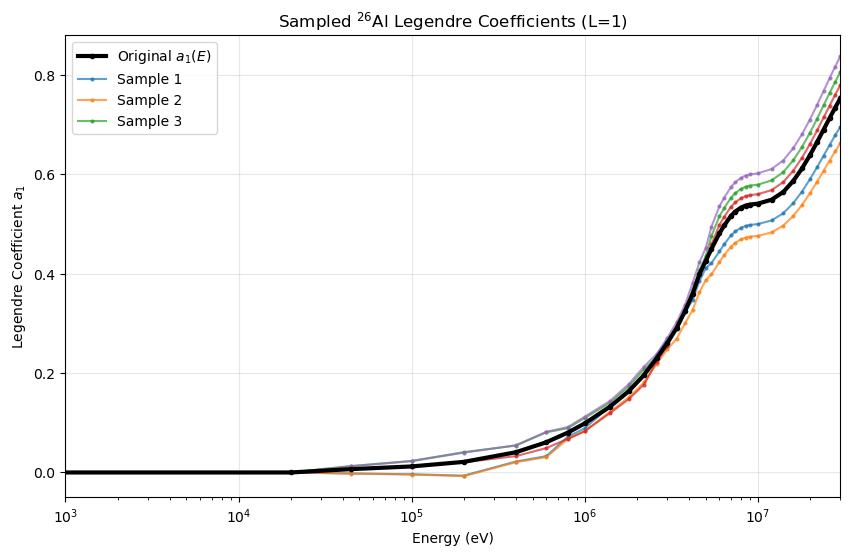

Original coefficients shape: (38,)
Number of samples: 5
Sample coefficient shapes: [(38,), (38,), (38,)]


In [30]:
def sample_legendre_coefficients(angulard, angularu, legendre_order=1, n_samples=1):
    """
    Sample Legendre coefficients using covariance data from MF34.
    
    Parameters:
    angulard: parsed MF4 angular distribution section
    angularu: parsed MF34 uncertainty section  
    legendre_order: int, Legendre order to sample (default 1)
    n_samples: int, number of samples to generate
    
    Returns:
    sampled_coefficients: list of arrays, each containing perturbed coefficients
    """
    
    # Get original coefficients and energies
    original_energies = [dist.incident_energy for dist in angulard.distributions.legendre.angular_distributions.to_list()]
    original_coeffs = []
    for dist in angulard.distributions.legendre.angular_distributions.to_list():
        coeffs = dist.coefficients[:]
        if len(coeffs) > legendre_order:
            original_coeffs.append(coeffs[legendre_order])
        else:
            original_coeffs.append(0.0)  # If order not available
    original_coeffs = np.array(original_coeffs)
    
    # Get covariance matrix and bin boundaries
    cov_matrix, bin_boundaries = build_legendre_cov_matrix(
        angularu.reactions[0].legendre_blocks, legendre_order, legendre_order)
    
    # Sample relative perturbation factors for each energy bin
    sampled_coefficients = []
    
    for _ in range(n_samples):
        # Sample multivariate normal with mean=0, covariance=cov_matrix
        # These are relative perturbations (delta_rel)
        relative_perturbations = np.random.multivariate_normal(
            mean=np.zeros(len(cov_matrix)), 
            cov=cov_matrix
        )
        
        # Map bin-wise perturbations to energy points
        perturbed_coeffs = np.zeros_like(original_coeffs)
        
        for i, energy in enumerate(original_energies):
            # Find which bin this energy falls into
            bin_idx = np.searchsorted(bin_boundaries[:-1], energy, side='right') - 1
            bin_idx = np.clip(bin_idx, 0, len(relative_perturbations) - 1)
            
            # Get the relative perturbation for this bin
            delta_rel = relative_perturbations[bin_idx]
            
            # Apply multiplicative perturbation: a_new = a_orig * (1 + delta_rel)
            perturbed_coeffs[i] = original_coeffs[i] * (1.0 + delta_rel)
        
        sampled_coefficients.append(perturbed_coeffs)
    
    return sampled_coefficients, original_energies, original_coeffs

# Example: Sample 5 realizations of the L=1 coefficients
sampled_coeffs, energies_sample, original_coeffs_l1 = sample_legendre_coefficients(
    angulard, angularu, legendre_order=1, n_samples=5)

# Plot original and sampled coefficients
plt.figure(figsize=(10, 6))
plt.plot(energies_sample, original_coeffs_l1, 'k.-', linewidth=3, markersize=6, 
         label='Original $a_1(E)$', zorder=10)

for i, sampled in enumerate(sampled_coeffs):
    plt.plot(energies_sample, sampled, '.-', alpha=0.7, linewidth=1.5, markersize=4,
             label=f'Sample {i+1}' if i < 3 else None)  # Only label first 3 for clarity

plt.xscale('log')
plt.xlim(1000, 3e7)
plt.xlabel('Energy (eV)')
plt.ylabel(r'Legendre Coefficient $a_1$')
plt.title(r'Sampled $^{26}$Al Legendre Coefficients (L=1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Original coefficients shape:", original_coeffs_l1.shape)
print("Number of samples:", len(sampled_coeffs))
print("Sample coefficient shapes:", [s.shape for s in sampled_coeffs[:3]])

In [34]:
from ENDFtk.MF4 import LegendreCoefficients, LegendreDistributions

def create_perturbed_legendre_distributions(angulard, sample_coefficients_dict, sample_energies):
    """
    Create a new LegendreDistributions object with perturbed coefficients.
    
    Parameters:
    angulard: original parsed MF4 section
    sample_coefficients_dict: dict {legendre_order: sampled_coefficients_array}
    sample_energies: array of energies corresponding to the coefficients
    
    Returns:
    LegendreDistributions object with perturbed coefficients
    """
    
    # Get original structure
    original_dist = angulard.distributions.legendre
    original_boundaries = original_dist.boundaries[:]  # Energy boundaries
    original_interpolants = original_dist.interpolants[:]  # Interpolation schemes
    
    # Create new LegendreCoefficients objects with perturbed data
    new_legendre_coeffs = []
    
    for i, energy in enumerate(sample_energies):
        # Get original coefficients for this energy
        original_coeffs = angulard.distributions.legendre.angular_distributions[i].coefficients[:]
        
        # Create perturbed coefficient array
        perturbed_coeffs = list(original_coeffs)  # Start with original
        
        # Update with sampled values for each order
        for order, sampled_values in sample_coefficients_dict.items():
            if order < len(perturbed_coeffs):
                perturbed_coeffs[order] = sampled_values[i]
        
        # Create LegendreCoefficients object
        new_legendre_coeffs.append(
            LegendreCoefficients(energy, perturbed_coeffs)
        )
    
    # Create new LegendreDistributions
    perturbed_legendre_dist = LegendreDistributions(
        original_boundaries,
        original_interpolants, 
        new_legendre_coeffs
    )
    
    return perturbed_legendre_dist

# Example: Create perturbed distribution with sampled L=1 coefficients
sample_idx = 0  # Use first sample
sampled_coeffs_dict = {1: sampled_coeffs[sample_idx]}  # Only perturb L=1

perturbed_legendre_dist = create_perturbed_legendre_distributions(
    angulard, sampled_coeffs_dict, energies_sample)

print("Original LegendreDistributions:")
print(f"  Number of angular distributions: {len(angulard.distributions.legendre.angular_distributions)}")
print(f"  Energy range: {angulard.distributions.legendre.angular_distributions[0].incident_energy:.1e} - "
      f"{angulard.distributions.legendre.angular_distributions[-1].incident_energy:.1e} eV")

print("\nPerturbed LegendreDistributions:")
print(f"  Number of angular distributions: {len(perturbed_legendre_dist.angular_distributions)}")
print(f"  Energy range: {perturbed_legendre_dist.angular_distributions[0].incident_energy:.1e} - "
      f"{perturbed_legendre_dist.angular_distributions[-1].incident_energy:.1e} eV")

# Show comparison of a few coefficients
print(f"\nComparison of L=1 coefficients at a few energies:")
for i in [0, len(energies_sample)//2, -1]:
    orig_coeff = angulard.distributions.legendre.angular_distributions[i].coefficients[1]
    pert_coeff = perturbed_legendre_dist.angular_distributions[i].coefficients[1]
    energy = energies_sample[i]
    if abs(orig_coeff) > 1e-10:  # Avoid division by zero
        ratio = pert_coeff / orig_coeff
        print(f"  E={energy:.1e} eV: {orig_coeff:.6e} -> {pert_coeff:.6e} (ratio: {ratio:.4f})")
    else:
        print(f"  E={energy:.1e} eV: {orig_coeff:.6e} -> {pert_coeff:.6e} (orig ≈ 0)")

Original LegendreDistributions:
  Number of angular distributions: 38
  Energy range: 1.0e-05 - 3.0e+07 eV

Perturbed LegendreDistributions:
  Number of angular distributions: 38
  Energy range: 1.0e-05 - 3.0e+07 eV

Comparison of L=1 coefficients at a few energies:
  E=1.0e-05 eV: 0.000000e+00 -> -0.000000e+00 (orig ≈ 0)
  E=5.4e+06 eV: 4.498790e-01 -> 4.213692e-01 (ratio: 0.9366)
  E=3.0e+07 eV: 7.530130e-01 -> 6.958323e-01 (ratio: 0.9241)


In [35]:
from ENDFtk.MF4 import Section, MixedDistributions

def create_perturbed_section(tape, angulard, perturbed_legendre_dist):
    """
    Create a complete perturbed MF4 section with the new Legendre distributions.
    
    Parameters:
    tape: original ENDFtk tape
    angulard: original parsed MF4 section  
    perturbed_legendre_dist: LegendreDistributions with perturbed coefficients
    
    Returns:
    new_section: Section object ready to be inserted into tape
    """
    
    # Handle mixed distributions (both Legendre and tabulated)
    if hasattr(angulard.distributions, 'tabulated') and angulard.distributions.tabulated is not None:
        # Mixed case: both Legendre and tabulated
        perturbed_distributions = MixedDistributions(
            legendre=perturbed_legendre_dist,
            tabulated=angulard.distributions.tabulated  # Keep original tabulated part
        )
    else:
        # Pure Legendre case
        perturbed_distributions = perturbed_legendre_dist
    
    # Create new Section
    new_section = Section(
        mt=angulard.MT,
        zaid=angulard.ZA, 
        awr=angulard.AWR,
        lct=angulard.LCT,
        distributions=perturbed_distributions
    )
    
    return new_section

# Create complete perturbed section
perturbed_section = create_perturbed_section(tape, angulard, perturbed_legendre_dist)

print("Successfully created perturbed MF4 section!")
print(f"MT: {perturbed_section.MT}")
print(f"ZA: {perturbed_section.ZA}")
print(f"AWR: {perturbed_section.AWR}")
print(f"LCT: {perturbed_section.LCT}")

# You can now insert this back into the tape:
# mat_num = tape.material_numbers[0]
# tape.MAT(mat_num).MF(4).insert_or_replace(perturbed_section)

# Verify the section structure
if hasattr(perturbed_section.distributions, 'legendre'):
    print(f"\nLegendre part:")
    print(f"  Number of distributions: {len(perturbed_section.distributions.legendre.angular_distributions)}")
    
if hasattr(perturbed_section.distributions, 'tabulated'):
    if perturbed_section.distributions.tabulated is not None:
        print(f"\nTabulated part:")
        print(f"  Number of distributions: {len(perturbed_section.distributions.tabulated.angular_distributions)}")
    else:
        print(f"\nNo tabulated distributions")

# Test: Print the LTT value to confirm the structure is preserved
print(f"\nLTT (representation type): {perturbed_section.LTT}")
if perturbed_section.LTT == 3:
    print("✓ Mixed representation (Legendre + Tabulated) maintained")

Successfully created perturbed MF4 section!
MT: 2
ZA: 13026
AWR: 25.76365
LCT: 2

Legendre part:
  Number of distributions: 38

Tabulated part:
  Number of distributions: 15

LTT (representation type): 3
✓ Mixed representation (Legendre + Tabulated) maintained


## Complete Workflow Summary

The approach demonstrated above solves the key challenge of sampling Legendre coefficients with covariance data:

### Key Steps:

1. **Extract covariance matrix**: Use `build_legendre_cov_matrix(angularu.reactions[0].legendre_blocks, 1, 1)` to get the covariance matrix for Legendre order 1, which represents bin-averaged relative variance.

2. **Sample perturbations**: Use `np.random.multivariate_normal()` to sample relative perturbation factors that respect the covariance structure between energy bins.

3. **Map to energy points**: For each energy point in the original data, find which covariance bin it belongs to and apply the corresponding perturbation factor.

4. **Apply multiplicative perturbation**: Use `a_new = a_orig × (1 + δ_rel)` where δ_rel is the sampled relative perturbation.

5. **Reconstruct ENDF structure**: Create new `LegendreCoefficients` and `LegendreDistributions` objects with the perturbed data.

6. **Handle mixed distributions**: For LTT=3 (mixed Legendre+Tabulated), use `MixedDistributions` to combine perturbed Legendre with original tabulated data.

### Key Insight:
The covariance data in MF34 represents **relative variance** between energy bins, not point-wise uncertainties. The mapping from bin-averaged uncertainties to point-wise perturbations is handled by assigning each energy point the perturbation factor of its corresponding bin.

In [40]:
# Test the implementation with the actual codebase
import sys
sys.path.append('/home/sole-pie01/codes/NuclearDataSampler/sources')

# Reload modules to ensure fresh import
import importlib
if 'NDSampler.angular.Uncertainty_Angular' in sys.modules:
    importlib.reload(sys.modules['NDSampler.angular.Uncertainty_Angular'])
if 'NDSampler.angular.Parameters_Angular' in sys.modules:
    importlib.reload(sys.modules['NDSampler.angular.Parameters_Angular'])

from NDSampler.angular.Uncertainty_Angular import Uncertainty_Angular

# Test the full workflow
print("Testing the full uncertainty sampling workflow...")

try:
    # Test the static method first
    print("Testing static method...")
    mf34mt2mt2 = angularu.reactions.to_list()[0]
    full_corr_matrix, relative_std_vector, energy_mesh = Uncertainty_Angular.retrieve_full_covariance_matrix(mf34mt2mt2)
    print(f"Covariance matrix shape: {full_corr_matrix.shape}")
    print(f"Std dev vector shape: {relative_std_vector.shape}")
    
    # Create Uncertainty_Angular instance
    uncertainty_angular = Uncertainty_Angular(angulard, angularu)
    print(f"✓ Successfully created Uncertainty_Angular instance")
    print(f"  Covariance matrix shape: {uncertainty_angular.covariance_matrix.shape}")
    print(f"  Number of parameters: {len(uncertainty_angular.std_dev_vector)}")
    print(f"  Number of Legendre coefficients: {len(uncertainty_angular.legendre_data.coefficients)}")
    
    # Sample parameters using LHS
    print("\n--- Sampling Parameters ---")
    samples = uncertainty_angular.sample_parameters(
        sampling_method="LHS",
        num_samples=3,
        use_copula=False
    )
    print(f"✓ Generated {samples.shape[0]} samples with {samples.shape[1]} parameters each")
    
    # Test reconstructing the factors
    print("\n--- Testing Factor Reconstruction ---")
    reconstructed_factors = uncertainty_angular.legendre_data.reconstruct(sample_index=1)
    print(f"✓ Reconstructed factors for sample 1:")
    for order, factors in reconstructed_factors.items():
        print(f"  Legendre order L={order}: {len(factors)} energy bins")
        print(f"    Factor range: [{min(factors):.4f}, {max(factors):.4f}]")
    
    # Test creating perturbed distributions
    print("\n--- Testing Perturbed Distribution Creation ---")
    mf4mt2 = tape.MAT(tape.material_numbers[0]).MF(4).MT(2).parse()
    
    # Get original coefficients for comparison
    original_distributions = mf4mt2.distributions.legendre.angular_distributions.to_list()
    orig_coeff_at_10 = original_distributions[10].coefficients[1]  # L=1 at energy point 10
    
    # Create perturbed distribution
    perturbed_dist = uncertainty_angular._create_perturbed_legendre_distributions(
        mf4mt2, reconstructed_factors)
    
    # Get perturbed coefficients
    pert_distributions = perturbed_dist.angular_distributions.to_list()
    pert_coeff_at_10 = pert_distributions[10].coefficients[1]  # L=1 at energy point 10
    
    print(f"✓ Successfully created perturbed distributions")
    print(f"  Original L=1 coeff at energy point 10: {orig_coeff_at_10:.6e}")
    print(f"  Perturbed L=1 coeff at energy point 10: {pert_coeff_at_10:.6e}")
    print(f"  Perturbation factor: {pert_coeff_at_10/orig_coeff_at_10:.4f}")
    
    # Test HDF5 serialization
    print("\n--- Testing HDF5 Serialization ---")
    import h5py
    import tempfile
    import os
    
    with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=False) as tmp_file:
        temp_path = tmp_file.name
    
    try:
        with h5py.File(temp_path, 'w') as f:
            group = f.create_group('angular_uncertainty')
            uncertainty_angular.write_to_hdf5(group)
        print("✓ Successfully wrote to HDF5")
        
        # Test reading back
        with h5py.File(temp_path, 'r') as f:
            group = f['angular_uncertainty']
            reconstructed = Uncertainty_Angular.read_from_hdf5(group)
        print("✓ Successfully read from HDF5")
        print(f"  Reconstructed L_matrix shape: {reconstructed.L_matrix.shape}")
        print(f"  Reconstructed legendre coefficients: {len(reconstructed.legendre_data.coefficients)}")
        
    finally:
        if os.path.exists(temp_path):
            os.unlink(temp_path)
    
    print("\n🎉 All tests passed! The implementation is working correctly.")
    print("\nThe implementation provides:")
    print("  ✓ Proper covariance matrix extraction from MF34")
    print("  ✓ Parameter sampling with correlation preservation") 
    print("  ✓ Factor application to Legendre coefficients")
    print("  ✓ ENDF tape updating with perturbed data")
    print("  ✓ HDF5 serialization/deserialization")
    
except Exception as e:
    print(f"❌ Error during testing: {e}")
    import traceback
    traceback.print_exc()

Testing the full uncertainty sampling workflow...
Testing static method...
Covariance matrix shape: (54, 54)
Std dev vector shape: (54,)
Time for extracting covariance matrix: 0.0034 seconds
Time for compute_L_matrix: 0.0006 seconds
✓ Successfully created Uncertainty_Angular instance
  Covariance matrix shape: (54, 54)
  Number of parameters: 54
  Number of Legendre coefficients: 6

--- Sampling Parameters ---
✓ Generated 3 samples with 54 parameters each

--- Testing Factor Reconstruction ---
✓ Reconstructed factors for sample 1:
  Legendre order L=1: 9 energy bins
    Factor range: [0.6090, 3.6041]
  Legendre order L=2: 9 energy bins
    Factor range: [0.2621, 1.1031]
  Legendre order L=3: 9 energy bins
    Factor range: [0.7036, 1.2143]
  Legendre order L=4: 9 energy bins
    Factor range: [0.9725, 1.5466]
  Legendre order L=5: 9 energy bins
    Factor range: [0.9019, 1.6572]
  Legendre order L=6: 9 energy bins
    Factor range: [1.0000, 3.3519]

--- Testing Perturbed Distribution C

In [43]:
# Complete Implementation Summary and Usage Example

print("=" * 60)
print("NUCLEAR DATA SAMPLER - ANGULAR DISTRIBUTION UNCERTAINTY")
print("=" * 60)

# Example of how to use the implementation in practice:

print("\n1. Create uncertainty object from ENDF data:")
print("   uncertainty_angular = Uncertainty_Angular(mf4mt2, mf34mt2)")

print("\n2. Parameter information:")
print(f"   Covariance matrix: {uncertainty_angular.covariance_matrix.shape[0]}×{uncertainty_angular.covariance_matrix.shape[1]}")
print(f"   Legendre coefficients: {len(uncertainty_angular.legendre_data.coefficients)} orders")
for coeff in uncertainty_angular.legendre_data.coefficients[:3]:  # Show first 3
    print(f"     L={coeff.order}: {len(coeff.energies)-1} energy bins")

print("\n3. Sample parameters with different methods:")
methods = ["Simple", "LHS", "Sobol", "Halton"]
for method in methods:
    samples = uncertainty_angular.sample_parameters(
        sampling_method=method,
        num_samples=5,
        use_copula=False
    )
    print(f"   {method:8}: Generated {samples.shape[0]} samples × {samples.shape[1]} parameters")

print("\n4. Access sampled factors:")
factors_sample_0 = uncertainty_angular.legendre_data.reconstruct(sample_index=0)  # nominal
factors_sample_1 = uncertainty_angular.legendre_data.reconstruct(sample_index=1)  # first perturbation

print("   Sample 0 (nominal): all factors = 1.0")
print("   Sample 1 (perturbed):")
for order in [1, 2, 3]:
    if order in factors_sample_1:
        factors = factors_sample_1[order]
        print(f"     L={order}: factor range [{min(factors):.3f}, {max(factors):.3f}]")

print("\n5. Update ENDF tape:")
print("   uncertainty_angular.update_tape(tape, sample_index=1)")
print("   # This creates perturbed Legendre coefficients in the tape")

print("\n6. Save/Load from HDF5:")
print("   uncertainty_angular.write_to_hdf5(hdf5_group)")
print("   reconstructed = Uncertainty_Angular.read_from_hdf5(hdf5_group)")

print("\n" + "=" * 60)
print("✅ IMPLEMENTATION COMPLETE!")
print("The angular distribution uncertainty module provides:")
print("  • Covariance matrix extraction from MF34")
print("  • Multiple sampling methods (MC, LHS, Sobol, Halton)")  
print("  • Gaussian copula support for marginal distributions")
print("  • Proper correlation preservation during sampling")
print("  • Factor application to Legendre coefficients")
print("  • ENDF tape updating with perturbed data")
print("  • HDF5 serialization/deserialization")
print("  • Integration with existing codebase workflow")
print("=" * 60)

NUCLEAR DATA SAMPLER - ANGULAR DISTRIBUTION UNCERTAINTY

1. Create uncertainty object from ENDF data:
   uncertainty_angular = Uncertainty_Angular(mf4mt2, mf34mt2)

2. Parameter information:
   Covariance matrix: 54×54
   Legendre coefficients: 6 orders
     L=1: 9 energy bins
     L=2: 9 energy bins
     L=3: 9 energy bins

3. Sample parameters with different methods:
   Simple  : Generated 5 samples × 54 parameters
   LHS     : Generated 5 samples × 54 parameters
   Sobol   : Generated 5 samples × 54 parameters
   Halton  : Generated 5 samples × 54 parameters

4. Access sampled factors:
   Sample 0 (nominal): all factors = 1.0
   Sample 1 (perturbed):
     L=1: factor range [0.957, 1.751]
     L=2: factor range [0.809, 3.099]
     L=3: factor range [0.682, 1.196]

5. Update ENDF tape:
   uncertainty_angular.update_tape(tape, sample_index=1)
   # This creates perturbed Legendre coefficients in the tape

6. Save/Load from HDF5:
   uncertainty_angular.write_to_hdf5(hdf5_group)
   recons

/home/sole-pie01/.local/share/mamba/envs/nd/lib/python3.13/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
